In [30]:
!pip install scikit-learn 
!pip install matplotlib 
!pip install pandas 
!pip install numpy 
%matplotlib inline 

In [31]:
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
import pandas as pd 
import numpy as np

In [32]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv') 
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [33]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

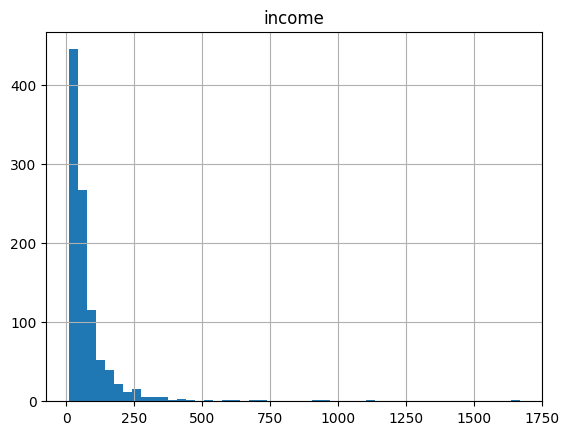

In [34]:
df.hist(column='income', bins=50) 

In [35]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [36]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  
X[0:5] 

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [37]:
y = df['custcat'].values 
y[0:5]

array([1, 4, 3, 1, 3])

In [38]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) 
print('Train set:', X_train.shape, y_train.shape) 
print('Test set:', X_test.shape, y_test.shape) 

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [41]:
yhat = neigh.predict(X_test)
yhat[0:5] 

array([3, 1, 3, 4, 4])

In [42]:
from sklearn import metrics 
print("Train set Accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train))) 
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat)) 

Train set Accuracy: 0.55875
Test set Accuracy: 0.26


In [43]:
k = 6 
neigh6 = KNeighborsClassifier(n_neighbors= k).fit(X_train, y_train)
yhat6= neigh6.predict(X_test) 
print("Train set Accuracy:", metrics.accuracy_score(y_train, neigh6.predict(X_train))) 
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat6)) 

Train set Accuracy: 0.4975
Test set Accuracy: 0.29


In [46]:
Ks = 10 
mean_acc = np.zeros((Ks-1)) 
std_acc = np.zeros((Ks-1)) 

for n in range(1,Ks): 

    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat=neigh.predict(X_test) 
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)

mean_acc 

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.29 , 0.345, 0.325, 0.32 ])

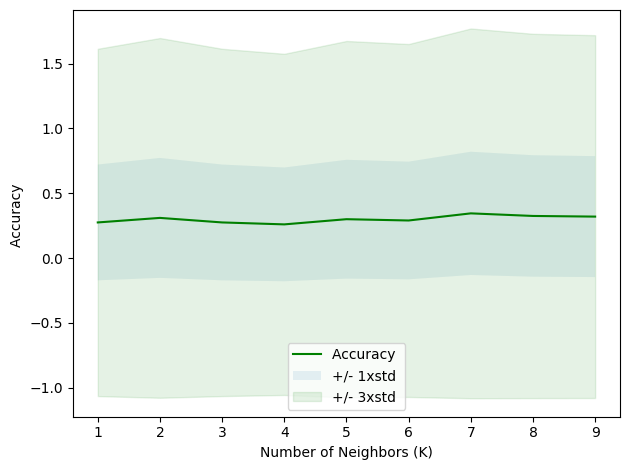

In [47]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [48]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.345 with k= 7
